$$
H = \frac{|p|^2}2 + \alpha \sin(\theta t) s + \frac{\gamma}{|q|}
$$

In [4]:
from integrators import contact as ic
from integrators.common import rk4s

In [5]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fast') #alt: 'seaborn-white'

#plt.rcParams.update({'font.size': 20, 'font.family': 'serif', 'font.weight':'normal'})
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['mathtext.fontset'] = "cm"

In [68]:
class MOsc:
    def __init__(self, γ, Θ, D=1, α=1, C=0):
        self.γ = γ
        self.D = D
        self.α = α
        self.C = C
        self.Θ = Θ
    def V(self, x, t):
        return self.D * np.square(1. - np.exp(-self.α * x)) - self.C
    def Vq(self, x, t):
        return 2 * self.D * self.α * np.exp(-self.α * x) * (1. - np.exp(-self.α * x))
    def f(self, t):
        return self.γ * np.sin(self.Θ * t)
    def energy(self, p, q, z, t):
        return 0.5*p**2 + self.f(t)*p + self.V(q, t)
osc = MOsc

## RK4 comparisons

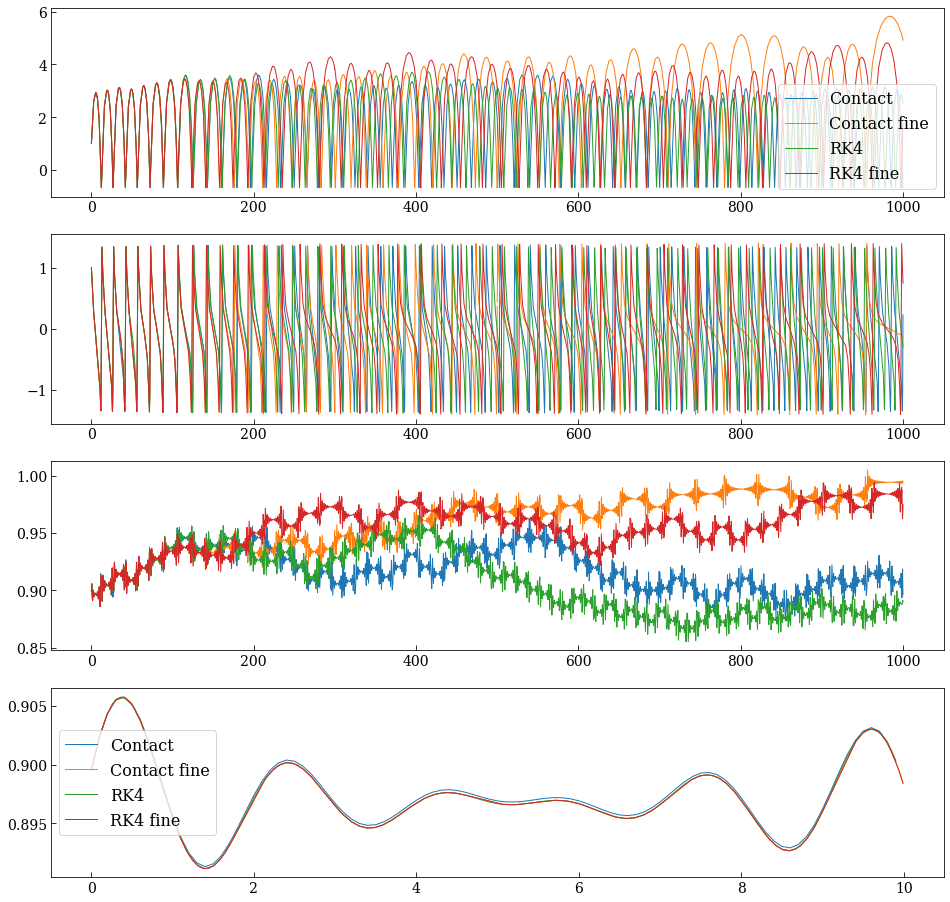

In [84]:
mosc = MOsc(0.01, np.pi)
dt = 0.1
tf = 1000

tspan = np.arange(0.0, tf, dt)
tspan_fine = np.arange(0.0, tf, dt/10)

for (p0, q0, s0) in [(1,1,0)]:
    fig = plt.figure(figsize=(16,16))
    
    sol, sols, _ = ic.integrate(ic.step1l, mosc, tspan, p0, q0, s0)
    solrk = rk4s(mosc, [p0,q0], tspan)
    solrk_fine = rk4s(mosc, [p0,q0], tspan_fine)
    sol_fine, sols_fine, _ = ic.integrate(ic.step1l, mosc, tspan_fine, p0, q0, s0)
    plt.subplot(411)
    plt.plot(tspan, sol[:,1], label="Contact", linewidth=1)
    plt.plot(tspan_fine, sol_fine[:,1], label="Contact fine", linewidth=1)
    plt.plot(tspan, solrk.T[1], label="RK4", linewidth=1)
    plt.plot(tspan_fine, solrk_fine.T[1], label="RK4 fine", linewidth=1)
    plt.legend()
    plt.subplot(412)
    plt.plot(tspan, sol[:,0], label="Contact", linewidth=1)
    plt.plot(tspan_fine, sol_fine[:,0], label="Contact fine", linewidth=1)
    plt.plot(tspan, solrk.T[0], label="RK4", linewidth=1)
    plt.plot(tspan_fine, solrk_fine.T[0], label="RK4 fine", linewidth=1)
    plt.subplot(413)
    plt.plot(tspan, mosc.energy(sol[:,0], sol[:,1], 0, tspan), label="Contact", linewidth=1)
    plt.plot(tspan_fine, mosc.energy(sol_fine[:,0], sol_fine[:,1], 0, tspan_fine), label="Contact fine", linewidth=1)
    plt.plot(tspan, mosc.energy(solrk.T[0], solrk.T[1], 0, tspan), label="RK4", linewidth=1)
    plt.plot(tspan_fine, mosc.energy(solrk_fine.T[0], solrk_fine.T[1], 0, tspan_fine), label="RK4 fine", linewidth=1)
    plt.subplot(414)
    cut=100
    plt.plot(tspan[:cut], mosc.energy(sol[:,0][:cut], sol[:,1][:cut], 0, tspan[:cut]), label="Contact", linewidth=1)
    plt.plot(tspan_fine[:cut*10], mosc.energy(sol_fine[:,0][:cut*10], sol_fine[:,1][:cut*10], 0, tspan_fine[:cut*10]), label="Contact fine", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(solrk.T[0][:cut], solrk.T[1][:cut], 0, tspan[:cut]), label="RK4", linewidth=1)
    plt.plot(tspan_fine[:cut*10], mosc.energy(solrk_fine.T[0][:cut*10], solrk_fine.T[1][:cut*10], 0, tspan_fine[:cut*10]), label="RK4 fine", linewidth=1)
    plt.legend()

    plt.show()


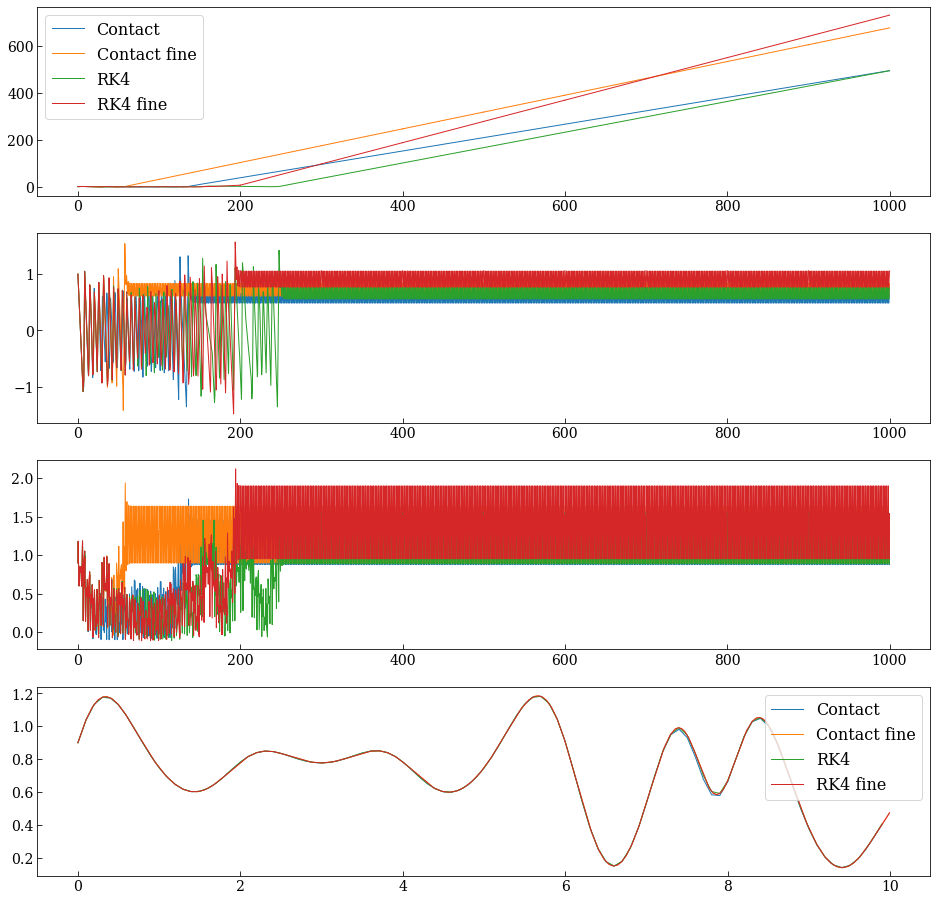

In [89]:
mosc = MOsc(0.5, np.pi)
dt = 0.1
tf = 1000

tspan = np.arange(0.0, tf, dt)
tspan_fine = np.arange(0.0, tf, dt/10)

for (p0, q0, s0) in [(1,1,0)]:
    fig = plt.figure(figsize=(16,16))
    
    sol, sols, _ = ic.integrate(ic.step1l, mosc, tspan, p0, q0, s0)
    solrk = rk4s(mosc, [p0,q0], tspan)
    solrk_fine = rk4s(mosc, [p0,q0], tspan_fine)
    sol_fine, sols_fine, _ = ic.integrate(ic.step1l, mosc, tspan_fine, p0, q0, s0)
    plt.subplot(411)
    plt.plot(tspan, sol[:,1], label="Contact", linewidth=1)
    plt.plot(tspan_fine, sol_fine[:,1], label="Contact fine", linewidth=1)
    plt.plot(tspan, solrk.T[1], label="RK4", linewidth=1)
    plt.plot(tspan_fine, solrk_fine.T[1], label="RK4 fine", linewidth=1)
    plt.legend()
    plt.subplot(412)
    plt.plot(tspan, sol[:,0], label="Contact", linewidth=1)
    plt.plot(tspan_fine, sol_fine[:,0], label="Contact fine", linewidth=1)
    plt.plot(tspan, solrk.T[0], label="RK4", linewidth=1)
    plt.plot(tspan_fine, solrk_fine.T[0], label="RK4 fine", linewidth=1)
    plt.subplot(413)
    plt.plot(tspan, mosc.energy(sol[:,0], sol[:,1], 0, tspan), label="Contact", linewidth=1)
    plt.plot(tspan_fine, mosc.energy(sol_fine[:,0], sol_fine[:,1], 0, tspan_fine), label="Contact fine", linewidth=1)
    plt.plot(tspan, mosc.energy(solrk.T[0], solrk.T[1], 0, tspan), label="RK4", linewidth=1)
    plt.plot(tspan_fine, mosc.energy(solrk_fine.T[0], solrk_fine.T[1], 0, tspan_fine), label="RK4 fine", linewidth=1)
    plt.subplot(414)
    cut=100
    plt.plot(tspan[:cut], mosc.energy(sol[:,0][:cut], sol[:,1][:cut], 0, tspan[:cut]), label="Contact", linewidth=1)
    plt.plot(tspan_fine[:cut*10], mosc.energy(sol_fine[:,0][:cut*10], sol_fine[:,1][:cut*10], 0, tspan_fine[:cut*10]), label="Contact fine", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(solrk.T[0][:cut], solrk.T[1][:cut], 0, tspan[:cut]), label="RK4", linewidth=1)
    plt.plot(tspan_fine[:cut*10], mosc.energy(solrk_fine.T[0][:cut*10], solrk_fine.T[1][:cut*10], 0, tspan_fine[:cut*10]), label="RK4 fine", linewidth=1)
    plt.legend()

    plt.show()


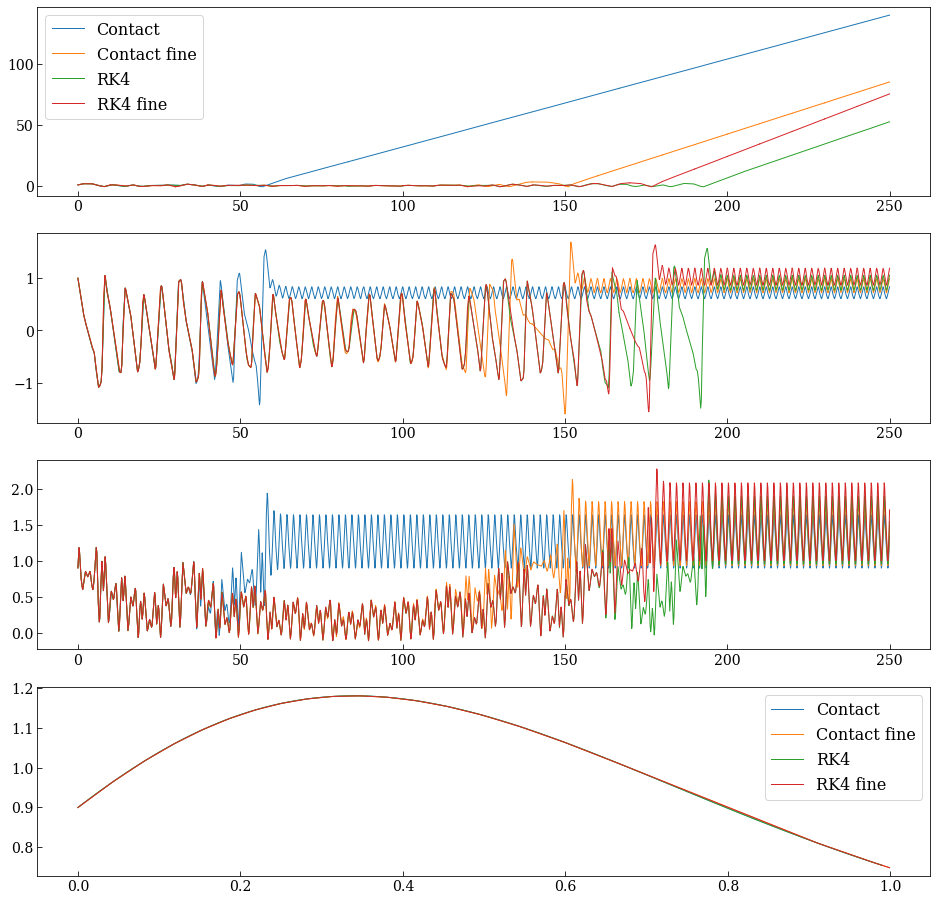

In [90]:
mosc = MOsc(0.5, np.pi)
dt = 0.01
tf = 250

tspan = np.arange(0.0, tf, dt)
tspan_fine = np.arange(0.0, tf, dt/10)

for (p0, q0, s0) in [(1,1,0)]:
    fig = plt.figure(figsize=(16,16))
    
    sol, sols, _ = ic.integrate(ic.step1l, mosc, tspan, p0, q0, s0)
    solrk = rk4s(mosc, [p0,q0], tspan)
    solrk_fine = rk4s(mosc, [p0,q0], tspan_fine)
    sol_fine, sols_fine, _ = ic.integrate(ic.step1l, mosc, tspan_fine, p0, q0, s0)
    plt.subplot(411)
    plt.plot(tspan, sol[:,1], label="Contact", linewidth=1)
    plt.plot(tspan_fine, sol_fine[:,1], label="Contact fine", linewidth=1)
    plt.plot(tspan, solrk.T[1], label="RK4", linewidth=1)
    plt.plot(tspan_fine, solrk_fine.T[1], label="RK4 fine", linewidth=1)
    plt.legend()
    plt.subplot(412)
    plt.plot(tspan, sol[:,0], label="Contact", linewidth=1)
    plt.plot(tspan_fine, sol_fine[:,0], label="Contact fine", linewidth=1)
    plt.plot(tspan, solrk.T[0], label="RK4", linewidth=1)
    plt.plot(tspan_fine, solrk_fine.T[0], label="RK4 fine", linewidth=1)
    plt.subplot(413)
    plt.plot(tspan, mosc.energy(sol[:,0], sol[:,1], 0, tspan), label="Contact", linewidth=1)
    plt.plot(tspan_fine, mosc.energy(sol_fine[:,0], sol_fine[:,1], 0, tspan_fine), label="Contact fine", linewidth=1)
    plt.plot(tspan, mosc.energy(solrk.T[0], solrk.T[1], 0, tspan), label="RK4", linewidth=1)
    plt.plot(tspan_fine, mosc.energy(solrk_fine.T[0], solrk_fine.T[1], 0, tspan_fine), label="RK4 fine", linewidth=1)
    plt.subplot(414)
    cut=100
    plt.plot(tspan[:cut], mosc.energy(sol[:,0][:cut], sol[:,1][:cut], 0, tspan[:cut]), label="Contact", linewidth=1)
    plt.plot(tspan_fine[:cut*10], mosc.energy(sol_fine[:,0][:cut*10], sol_fine[:,1][:cut*10], 0, tspan_fine[:cut*10]), label="Contact fine", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(solrk.T[0][:cut], solrk.T[1][:cut], 0, tspan[:cut]), label="RK4", linewidth=1)
    plt.plot(tspan_fine[:cut*10], mosc.energy(solrk_fine.T[0][:cut*10], solrk_fine.T[1][:cut*10], 0, tspan_fine[:cut*10]), label="RK4 fine", linewidth=1)
    plt.legend()

    plt.show()


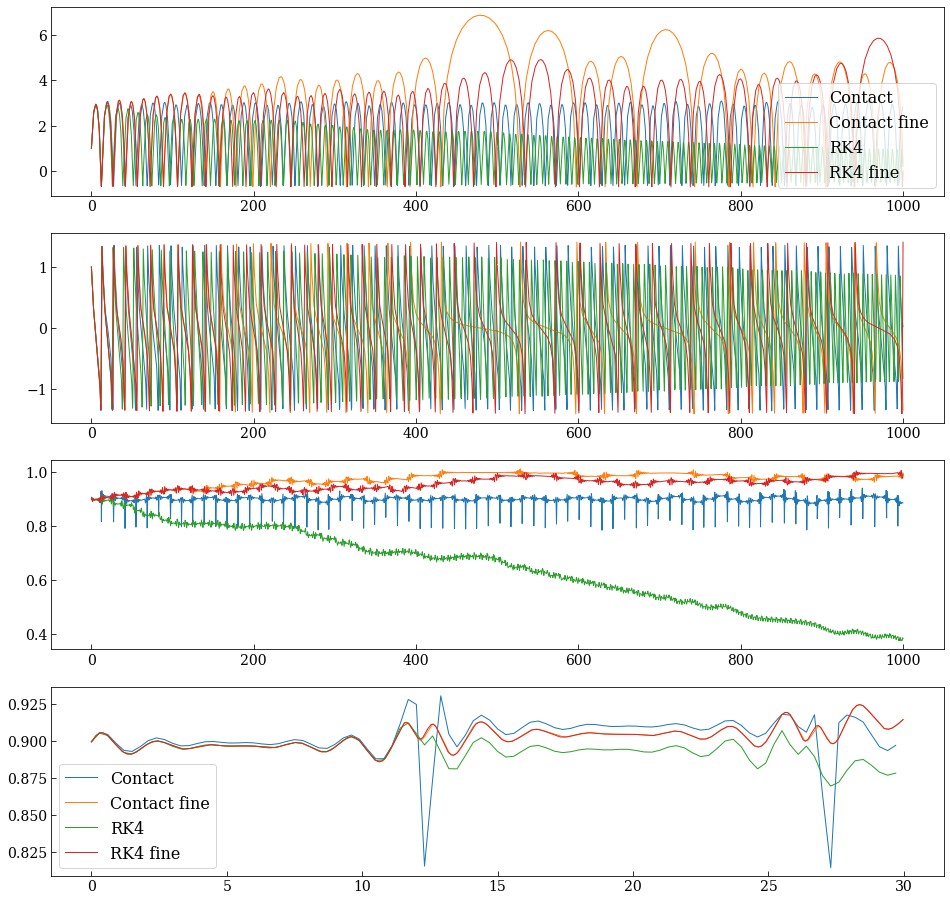

In [91]:
mosc = MOsc(0.01, np.pi)
dt = 0.3
tf = 1000

tspan = np.arange(0.0, tf, dt)
tspan_fine = np.arange(0.0, tf, dt/10)

for (p0, q0, s0) in [(1,1,0)]:
    fig = plt.figure(figsize=(16,16))
    
    sol, sols, _ = ic.integrate(ic.step1l, mosc, tspan, p0, q0, s0)
    solrk = rk4s(mosc, [p0,q0], tspan)
    solrk_fine = rk4s(mosc, [p0,q0], tspan_fine)
    sol_fine, sols_fine, _ = ic.integrate(ic.step1l, mosc, tspan_fine, p0, q0, s0)
    plt.subplot(411)
    plt.plot(tspan, sol[:,1], label="Contact", linewidth=1)
    plt.plot(tspan_fine, sol_fine[:,1], label="Contact fine", linewidth=1)
    plt.plot(tspan, solrk.T[1], label="RK4", linewidth=1)
    plt.plot(tspan_fine, solrk_fine.T[1], label="RK4 fine", linewidth=1)
    plt.legend()
    plt.subplot(412)
    plt.plot(tspan, sol[:,0], label="Contact", linewidth=1)
    plt.plot(tspan_fine, sol_fine[:,0], label="Contact fine", linewidth=1)
    plt.plot(tspan, solrk.T[0], label="RK4", linewidth=1)
    plt.plot(tspan_fine, solrk_fine.T[0], label="RK4 fine", linewidth=1)
    plt.subplot(413)
    plt.plot(tspan, mosc.energy(sol[:,0], sol[:,1], 0, tspan), label="Contact", linewidth=1)
    plt.plot(tspan_fine, mosc.energy(sol_fine[:,0], sol_fine[:,1], 0, tspan_fine), label="Contact fine", linewidth=1)
    plt.plot(tspan, mosc.energy(solrk.T[0], solrk.T[1], 0, tspan), label="RK4", linewidth=1)
    plt.plot(tspan_fine, mosc.energy(solrk_fine.T[0], solrk_fine.T[1], 0, tspan_fine), label="RK4 fine", linewidth=1)
    plt.subplot(414)
    cut=100
    plt.plot(tspan[:cut], mosc.energy(sol[:,0][:cut], sol[:,1][:cut], 0, tspan[:cut]), label="Contact", linewidth=1)
    plt.plot(tspan_fine[:cut*10], mosc.energy(sol_fine[:,0][:cut*10], sol_fine[:,1][:cut*10], 0, tspan_fine[:cut*10]), label="Contact fine", linewidth=1)
    plt.plot(tspan[:cut], mosc.energy(solrk.T[0][:cut], solrk.T[1][:cut], 0, tspan[:cut]), label="RK4", linewidth=1)
    plt.plot(tspan_fine[:cut*10], mosc.energy(solrk_fine.T[0][:cut*10], solrk_fine.T[1][:cut*10], 0, tspan_fine[:cut*10]), label="RK4 fine", linewidth=1)
    plt.legend()

    plt.show()
